**Task 4**

In [1]:
!pip install jiwer pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 48.7 MB/s eta 0:00:00


**Importing Libraries**

In [2]:
import pandas as pd
from jiwer import wer

In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()

Saving task4.csv to task4.csv


,segment_url_link,Human,Model H,Model i,Model k,Model l,Model m,Model n,Unnamed: 8
0,https://storage.googleapis.com/testing_audio_f...,वही अपना खेती बाड़ी और क्या,वही अपना खेती बाड़ी और क्या,वही अपना खेती बाड़ी और क्या,वही अपना खेती बाड़ी और क्या?,वही अपना खेती बाड़ी और क्या,वही अपना खेतीबाड़ी और क्या,वही अपना खेती बाड़ी और क्या,NaN
1,https://storage.googleapis.com/testing_audio_f...,मौनता का अर्थ क्या होता है,मौनता का अर्थ क्या होता है,मौनता का अर्थ क्या होता है?,मौन तागार थके होतई।,मोनता का अर्थ है क्या होता है,मोन ताका हर थक्या होताहए,मौनता का हर थका होता है,NaN
2,https://storage.googleapis.com/testing_audio_f...,और रक्षाबंधन पे चलो बहनों को,और रक्षाबंधन पे चलो बहनों को,और रक्षाबंधन पे चलो बहनों को --,और रक्षाबंधन पे चलो बहनों को?,और रक्षाबंधन पे चलो बहनों को,और रक्षा बंधन पे चलो बहनों को,और रक्षा बंधन पे चलो बहनों को,NaN
3,https://storage.googleapis.com/testing_audio_f...,एक सिंपल और सादा वे में,एक सिंपल और सादा वे में,एक सिंपल और सादा वे में।,एक सिंपल और सादा वे में?,एक सिंपल और सादावे में,एक सिंपल और सादा वे में,एक सिंपल और सादा वे में,NaN
4,https://storage.googleapis.com/testing_audio_f...,आने वाली चुनौतियों का इंतजार करना,आने वाली चुनौतियों का इंतजार करना,आने वाली चुनौतियों का इंतजार करना।,आने वाली चुनौतियों का इंतजार करना?,आने वाली चुनौतियों का इंतजार करना,आने वाली चुनौतियों का इंतजार करना,आने वाली चुनौतियों का इंतजार करना,NaN


**Calculating WER for Each Model**

In [4]:
models = ["Model H","Model i","Model k","Model l","Model m","Model n"]

results = {}

for model in models:
    total_wer = 0

    for i in range(len(df)):
        reference = str(df.loc[i,"Human"])
        hypothesis = str(df.loc[i,model])
        total_wer += wer(reference, hypothesis)

    avg_wer = total_wer / len(df)
    results[model] = avg_wer

results

{'Model H': 0.03977263534937402,
 'Model i': 0.07303633118329056,
 'Model k': 0.24426456838740365,
 'Model l': 0.11323879790317998,
 'Model m': 0.20730103077585332,
 'Model n': 0.11388090607047488}

**Converting WER to Accuracy %**

In [5]:
accuracy = {}

for model, w in results.items():
    accuracy[model] = (1 - w) * 100

accuracy

{'Model H': 96.0227364650626,
 'Model i': 92.69636688167094,
 'Model k': 75.57354316125964,
 'Model l': 88.67612020968201,
 'Model m': 79.26989692241466,
 'Model n': 88.61190939295251}

**Ranking Model (Best To the  Worst)**

In [6]:
ranking = sorted(accuracy.items(), key=lambda x: x[1], reverse=True)

print("MODEL RANKING (BEST → WORST)\n")
for rank, (model, acc) in enumerate(ranking,1):
    print(f"{rank}. {model} → {acc:.2f}% accuracy")

MODEL RANKING (BEST → WORST)

1. Model H → 96.02% accuracy
2. Model i → 92.70% accuracy
3. Model l → 88.68% accuracy
4. Model n → 88.61% accuracy
5. Model m → 79.27% accuracy
6. Model k → 75.57% accuracy


**Detail Comparison Table**

In [7]:
summary = pd.DataFrame({
"Model": accuracy.keys(),
"WER": results.values(),
"Accuracy %": accuracy.values()
})

summary.sort_values("Accuracy %", ascending=False)

,Model,WER,Accuracy %
0,Model H,0.039773,96.022736
1,Model i,0.073036,92.696367
3,Model l,0.113239,88.676120
5,Model n,0.113881,88.611909
4,Model m,0.207301,79.269897
2,Model k,0.244265,75.573543


In [8]:
summary.to_csv("ASR_Model_Evaluation.csv", index=False)
print("Saved successfully!")

Saved successfully!


**Visual Graph**

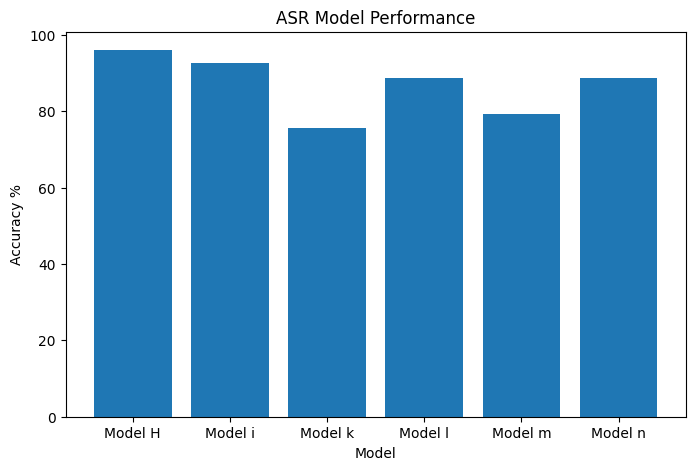

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(summary["Model"], summary["Accuracy %"])
plt.xlabel("Model")
plt.ylabel("Accuracy %")
plt.title("ASR Model Performance")
plt.show()